<a href="https://colab.research.google.com/github/sanjulikasharma/Machine-Learning-Algorithms-/blob/main/Visualizing_Difference_between_SGD_and_Gradient_Descent_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

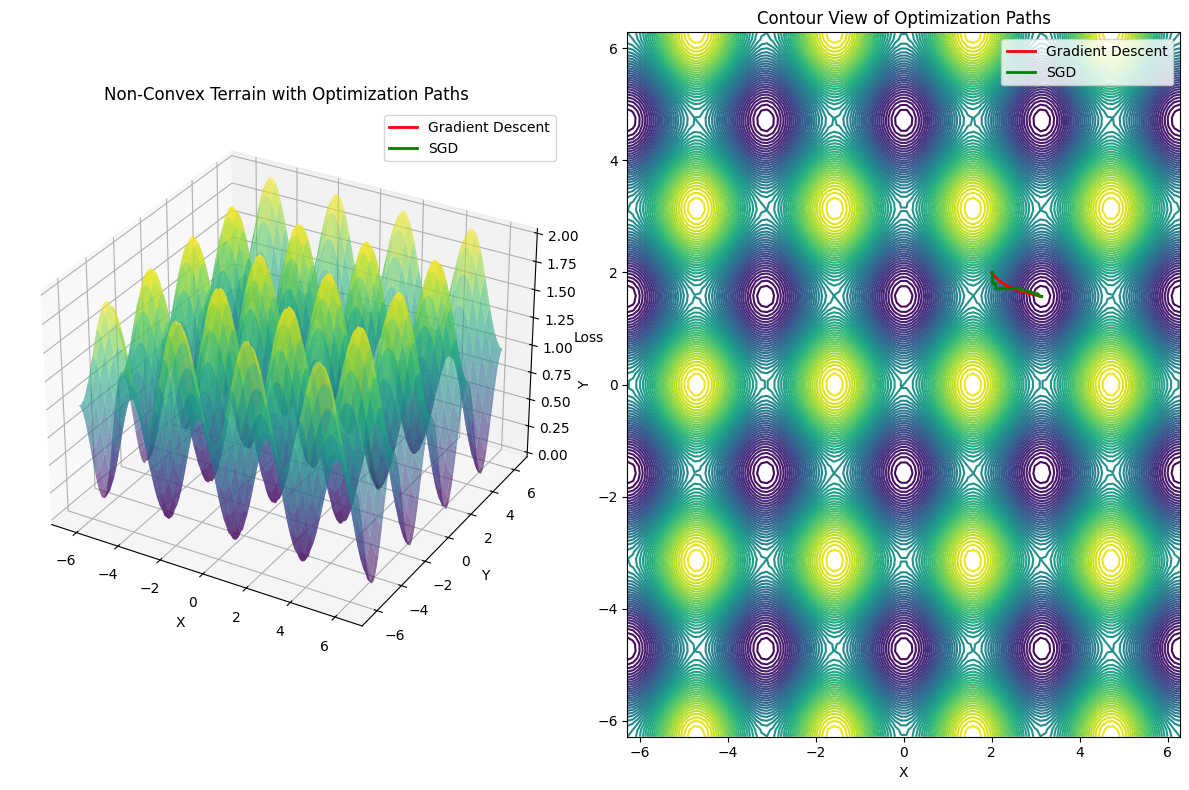

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Non-convex loss function (e.g., a simple 3D sine function)
def loss_function(x, y):
    return np.sin(x) ** 2 + np.cos(y) ** 2

# Gradient of the loss function (partial derivatives)
def gradient(x, y):
    grad_x = 2 * np.sin(x) * np.cos(x)  # ∂L/∂x
    grad_y = -2 * np.sin(y) * np.cos(y) # ∂L/∂y
    return grad_x, grad_y

# Simulate Gradient Descent (GD) and Stochastic Gradient Descent (SGD)
def gradient_descent(start, learning_rate, steps):
    path = [start]
    x, y = start
    for _ in range(steps):
        grad_x, grad_y = gradient(x, y)
        x -= learning_rate * grad_x
        y -= learning_rate * grad_y
        path.append((x, y))
    return np.array(path)

def stochastic_gradient_descent(start, learning_rate, steps):
    path = [start]
    x, y = start
    for _ in range(steps):
        grad_x, grad_y = gradient(x, y)
        # Randomly select a direction for SGD to mimic exploration
        if np.random.rand() > 0.5:
            x -= learning_rate * grad_x
        else:
            y -= learning_rate * grad_y
        path.append((x, y))
    return np.array(path)

# Generate a mesh grid for the terrain
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)
y = np.linspace(-2 * np.pi, 2 * np.pi, 100)
x, y = np.meshgrid(x, y)
z = loss_function(x, y)

# Plotting the terrain and optimization paths
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', alpha=0.6)

# Gradient Descent path
gd_start = (2, 2)
gd_path = gradient_descent(gd_start, 0.1, 50)
ax.plot(gd_path[:, 0], gd_path[:, 1], loss_function(gd_path[:, 0], gd_path[:, 1]), color='r', label="Gradient Descent", linewidth=2)

# Stochastic Gradient Descent path
sgd_start = (2, 2)
sgd_path = stochastic_gradient_descent(sgd_start, 0.1, 50)
ax.plot(sgd_path[:, 0], sgd_path[:, 1], loss_function(sgd_path[:, 0], sgd_path[:, 1]), color='g', label="SGD", linewidth=2)

ax.set_title("Non-Convex Terrain with Optimization Paths")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Loss")
ax.legend()

# Second subplot showing comparison of paths
ax2 = fig.add_subplot(122)
ax2.contour(x, y, z, 50, cmap='viridis')
ax2.plot(gd_path[:, 0], gd_path[:, 1], color='r', label="Gradient Descent", linewidth=2)
ax2.plot(sgd_path[:, 0], sgd_path[:, 1], color='g', label="SGD", linewidth=2)

ax2.set_title("Contour View of Optimization Paths")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.legend()

plt.tight_layout()
plt.show()
